# Interpolative Decomposition

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as pt

## Obtain a low-rank matrix

2.3513490975788167e-13


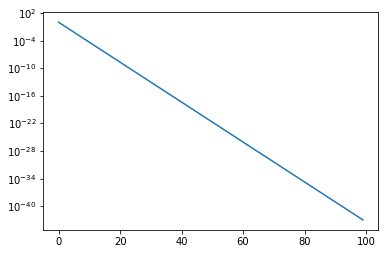

In [2]:
n = 100
A0 = np.random.randn(n, n)
U0, sigma0, VT0 = la.svd(A0)
print(la.norm((U0*sigma0) @ VT0 - A0))

sigma = np.exp(-np.arange(n))

A = (U0 * sigma).dot(VT0)
pt.semilogy(sigma)

## Run the factorization

In [3]:
import scipy.linalg.interpolative as sli

Compute a fixed-rank factorization:

(There's also an adaptive, fixed-precision mode.)

In [4]:
k = 20
idx, proj = sli.interp_decomp(A, k)

Examine `idx`:

In [5]:
#clear
idx

array([49, 97, 46, 22, 18, 35, 13, 88, 99, 83, 59, 61, 71,  3, 55, 67, 73,
        0, 40,  2, 20, 21,  6, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34,  5, 36, 37, 38, 39,  4, 41, 42, 43, 44, 45, 19, 47, 48, 17, 50,
       51, 52, 53, 54, 14, 56, 57, 58, 10, 60, 11, 62, 63, 64, 65, 66, 15,
       68, 69, 70, 12, 72, 16, 74, 75, 76, 77, 78, 79, 80, 81, 82,  9, 84,
       85, 86, 87,  7, 89, 90, 91, 92, 93, 94, 95, 96,  1, 98,  8],
      dtype=int32)

What does `numpy.argsort` do?

In [6]:
#clear
sort_idx = np.argsort(idx)

In [7]:
#clear
idx[sort_idx]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int32)

Reconstruct the matrix:

In [8]:
B = A[:,idx[:k]]
P = np.hstack([np.eye(k), proj])[:,np.argsort(idx)]
Aapprox = B@P

In [9]:
#clear
la.norm(A - Aapprox, 2)

7.211609036219504e-09

What's the structure of $P$?

(ignoring the column permuation)

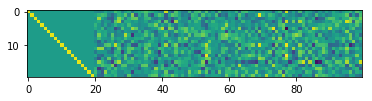

In [10]:
pt.imshow(np.hstack([np.eye(k), proj]))